In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Global_Superstore_100.csv")

In [3]:
df = df.dropna() 

In [4]:
df = df.drop_duplicates()

In [6]:
# Select only numeric columns for IQR calculation
numeric_df = df.select_dtypes(include='number')

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
# Summary only for numeric columns
print("Basic Statistical Summary:\n", df.describe(include='number'))

# Correlation only on numeric columns
print("\nCorrelation Matrix:\n", df.select_dtypes(include='number').corr())

Basic Statistical Summary:
             Row ID  Postal Code       Sales   Quantity   Discount     Profit  \
count     10.00000     10.00000   10.000000  10.000000  10.000000  10.000000   
mean   36510.20000  57880.00000   42.307000   2.900000   0.100000   4.759000   
std     3042.86436  33555.38144   71.881384   1.852926   0.105409   2.158778   
min    31774.00000   6360.00000    5.250000   1.000000   0.000000   0.590000   
25%    34472.25000  34025.75000    8.100000   1.250000   0.000000   3.622500   
50%    36501.50000  63909.00000   13.115000   2.500000   0.100000   5.255000   
75%    38546.75000  86311.00000   22.727500   4.500000   0.200000   5.740000   
max    40507.00000  98226.00000  231.920000   6.000000   0.200000   7.850000   

       Shipping Cost  
count      10.000000  
mean        3.642000  
std         3.879424  
min         1.260000  
25%         1.565000  
50%         1.820000  
75%         3.247500  
max        12.950000  

Correlation Matrix:
                  Row I

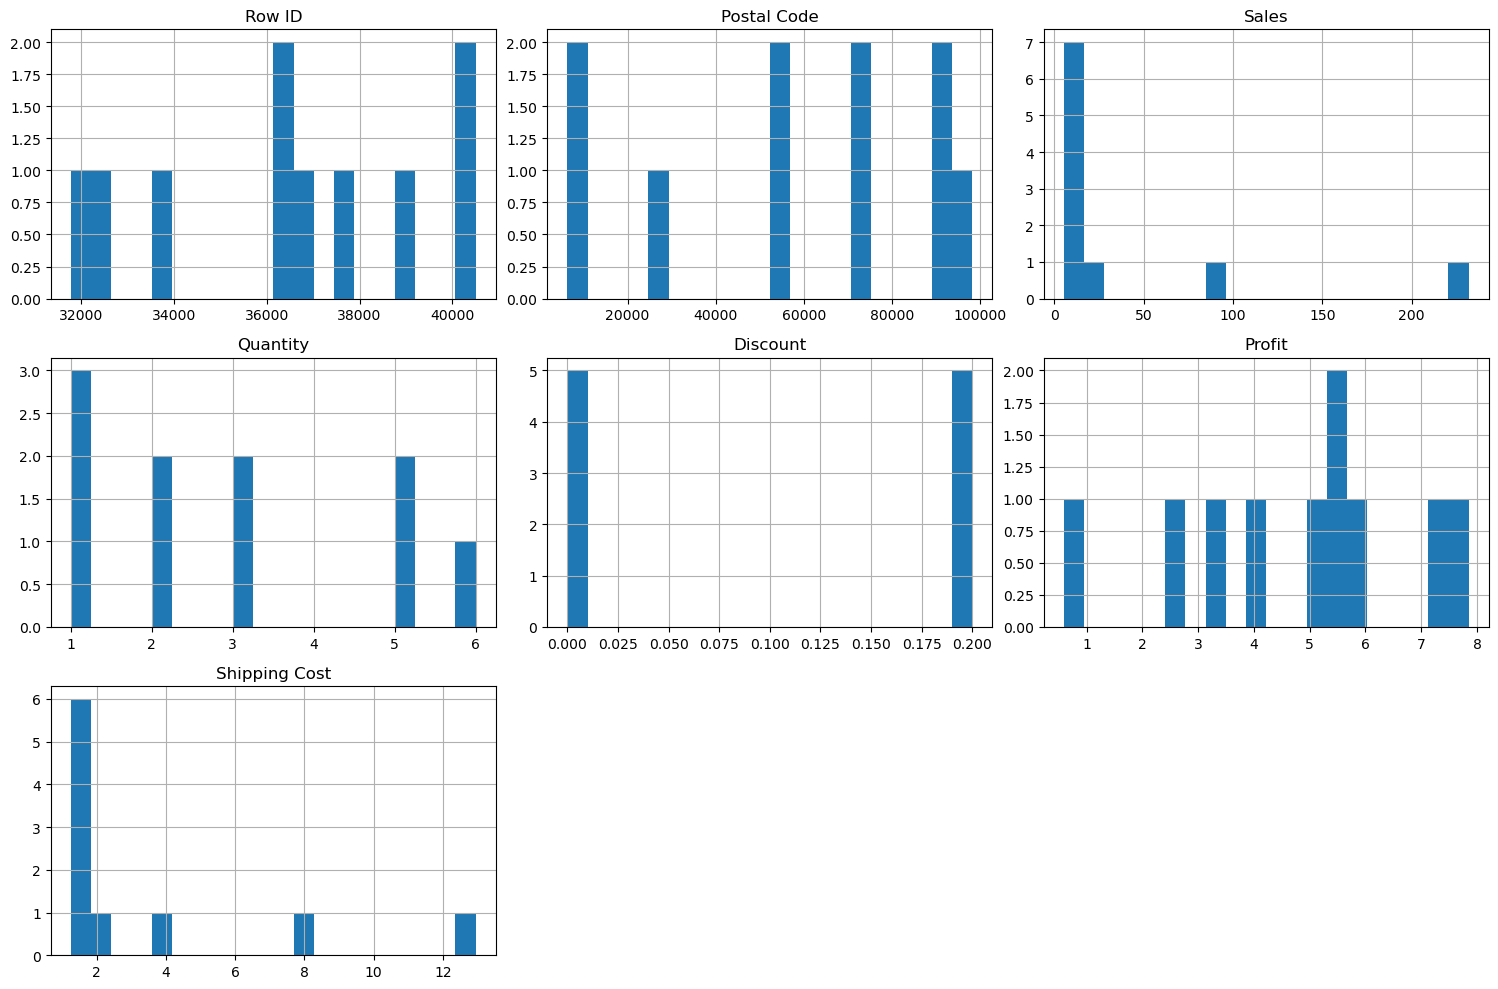

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

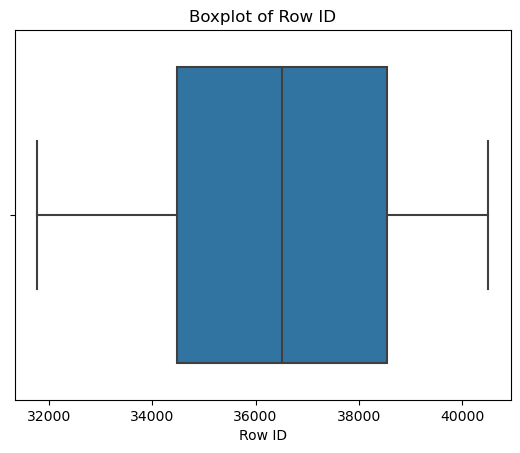

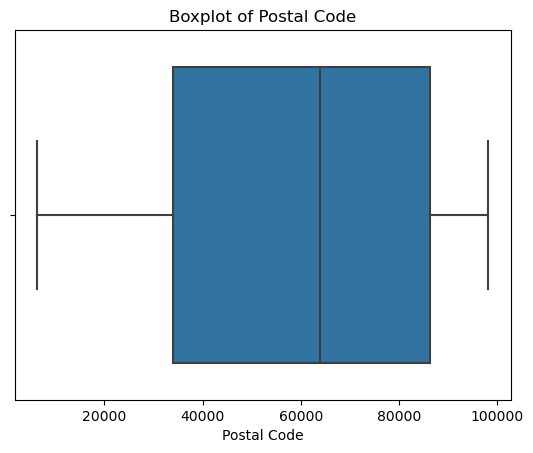

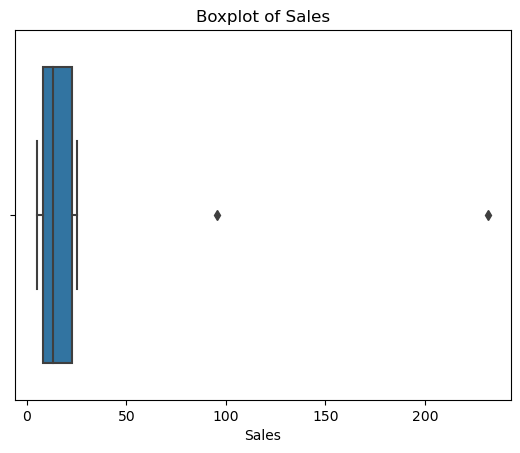

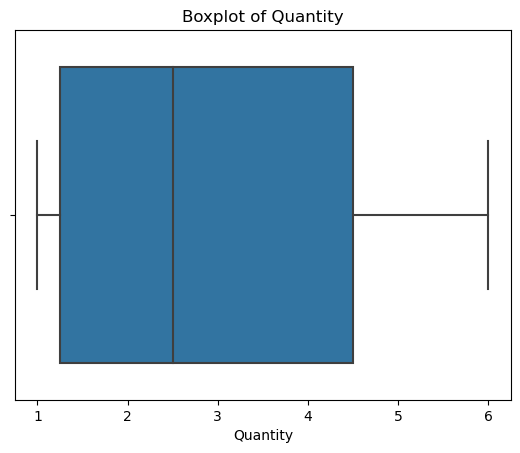

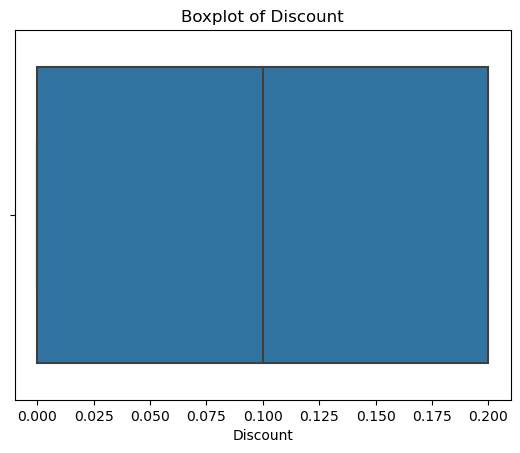

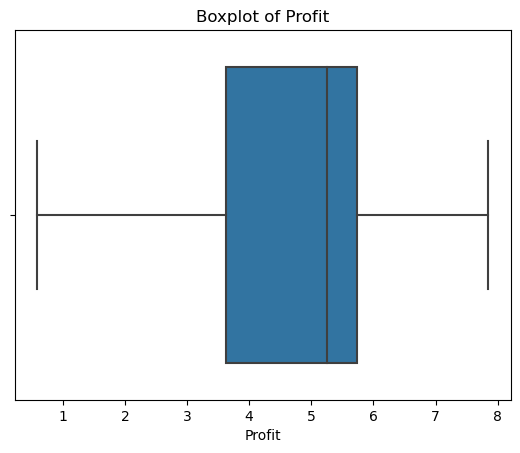

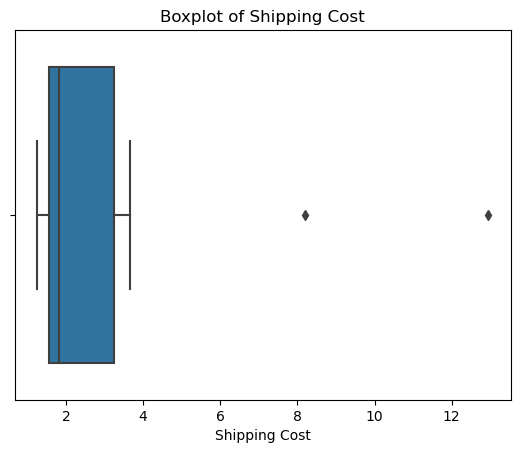

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

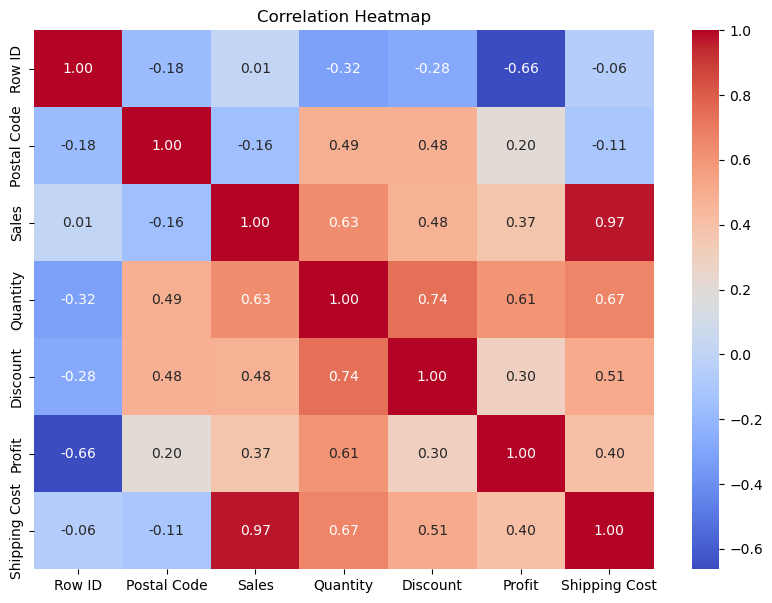

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()